# Optimize ClickToRate using UCB


In [38]:
import pandas as pd
import numpy as np
import math

## Load the data


In [8]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Random Selecting


In [9]:
import random

In [31]:
N = 10000 # No of rounds
d = 10 # No of Ads
total_reward = 0
ads_selected = []
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = data.values[n, ad]
    total_reward = total_reward + reward

In [32]:
total_reward

1278

In [33]:
import matplotlib.pyplot as plt

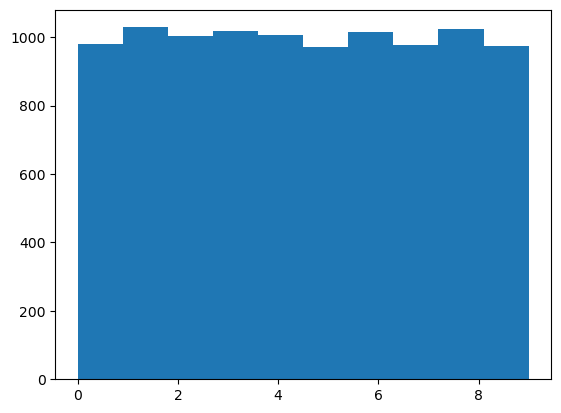

In [34]:
plt.hist(ads_selected)
plt.show()

## UCB


Refer the below steps in notion


At each round we consider two number for each ad i

- number of times the ad i was selected upto n rounds
- sum of reward of ad i upto n rounds


In [78]:
numbers_of_selection = [0] * d
sum_of_rewards = [0] * d
ads_selected = []
total_reward = 0

On each round we calculate the average reward and confidence interval


### Algorithm

In [79]:
for n in range(0, N):
    ad = 0
    max_upperbound = 0
    for i in range(0, d):
        if numbers_of_selection[i] > 0:  ## No of rounds to explore
            average_reward = (
                sum_of_rewards[i] / numbers_of_selection[i]
            )  # Average reward
            delta_i = math.sqrt(3 / 2 * math.log(n + 1) / numbers_of_selection[i])
            upperbound = average_reward + delta_i
        else:
            upperbound = 1e400
        if max_upperbound < upperbound:
            max_upperbound = upperbound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] += 1
    reward = data.values[n, ad]
    sum_of_rewards[ad] += reward
    total_reward += reward

(array([ 705.,  387.,  186.,  345., 6323.,  150.,  292., 1170.,  256.,
         186.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

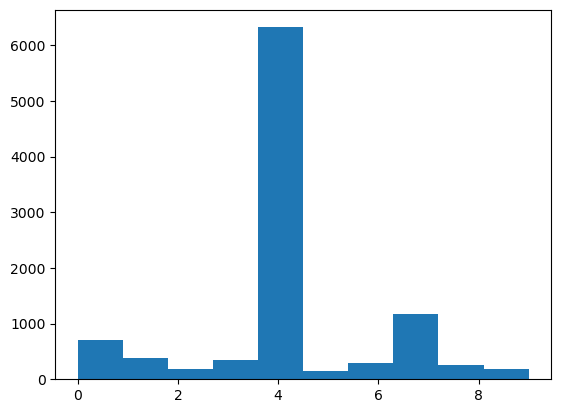

In [80]:
plt.hist(ads_selected)

In [81]:
total_reward

2178